<a href="https://colab.research.google.com/github/karkhotin/fruit-leaf-models-leaf-disease-app/blob/main/Creating_a_leaf_detector_based_on_plantDoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip PlantDoc-416x416.zip -d /content/

Показано результат, скорочений до останніх рядків (5000).
  inflating: /content/__MACOSX/PlantDoc-416x416/train/images/._Corn020Fig2_jpg.rf.e20395ed387463bfd11f0c455f6e15a5.jpg  
  inflating: /content/PlantDoc-416x416/train/images/bacterialspot3_600px_jpg.rf.dddffc038908587dfac42d3fa1060951.jpg  
  inflating: /content/__MACOSX/PlantDoc-416x416/train/images/._bacterialspot3_600px_jpg.rf.dddffc038908587dfac42d3fa1060951.jpg  
  inflating: /content/PlantDoc-416x416/train/images/P1110947+Rubus+idaeus+fr+St_+Joe+River_JPG_jpg.rf.b56bda7c1f411037e3f6f9b2b4b2e44d.jpg  
  inflating: /content/__MACOSX/PlantDoc-416x416/train/images/._P1110947+Rubus+idaeus+fr+St_+Joe+River_JPG_jpg.rf.b56bda7c1f411037e3f6f9b2b4b2e44d.jpg  
  inflating: /content/PlantDoc-416x416/train/images/apple-scab-leaf-big_jpg.rf.f7be8031b2ded242357b6d249a3b2a5f.jpg  
  inflating: /content/__MACOSX/PlantDoc-416x416/train/images/._apple-scab-leaf-big_jpg.rf.f7be8031b2ded242357b6d249a3b2a5f.jpg  
  inflating: /content/PlantDoc-4

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 27.3 MB/s eta 0:00:00


# Prepare original dataset
Change labels for a cls - "Leaf"

In [ ]:
dirname = "/content/PlantDoc/train/labels"
for txt_in in os.listdir(dirname):
    with open(os.path.join(dirname, txt_in), 'r') as f:
        result = []
        for line in f:
            line = line.rstrip()
            # Only split once since you're only check the first word
            words = line.split(" ", maxsplit = 1)
            word = words[0]
            if word != "0":
                rep = word
                word = word.replace(rep, '0')
            else:
                pass
            # Update the word you modified
            words[0] = word
            result.append(" ".join(words))

    with open(os.path.join(dirname, txt_in), 'w') as f:
        # Convert result list to string and write to file
        outfile = '\n'.join(result)
        f.write(outfile)

In [ ]:
dirname = "/content/PlantDoc/test/labels"
for txt_in in os.listdir(dirname):
    with open(os.path.join(dirname, txt_in), 'r') as f:
        result = []
        for line in f:
            line = line.rstrip()
            words = line.split(" ", maxsplit = 1)
            word = words[0]
            if word != "0":
                rep = word
                word = word.replace(rep, '0')
            else:
                pass
            words[0] = word
            result.append(" ".join(words))

    with open(os.path.join(dirname, txt_in), 'w') as f:
        outfile = '\n'.join(result)
        f.write(outfile)

In [ ]:
import shutil

shutil.make_archive('run-archive', 'zip', '/content/runs')

'/content/run-archive.zip'

In [ ]:
source_folder = '/content/runs'

# Define the destination folder in Google Drive
destination_folder = '/content/drive/My Drive/Dataset/runs_backup'

# Check if the source folder exists
if os.path.exists(source_folder):
    shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)
    print(f"Folder 'runs' has been successfully copied to: {destination_folder}")
else:
    print(f"Source folder '{source_folder}' does not exist!")

Folder 'runs' has been successfully copied to: /content/drive/My Drive/Dataset/runs_backup


# Train YOLOv8m

In [ ]:
model_single_orig = YOLO('yolov8m.pt')

# Train the model with adjusted parameters
results_single_orig = model_single_orig.train(
    data='/content/PlantDoc/data.yaml',
    epochs=250,
    imgsz=416,
    batch=16,
    lr0=0.02,
    optimizer = "SGD",
    single_cls=True,
    patience=50,
    amp=True,
    plots = True,
    name='yolov8_single_orig'
)

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/PlantDoc/data.yaml, epochs=250, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_single_orig, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 79.0MB/s]


AMP: checks passed ✅


train: Scanning /content/PlantDoc/train/labels... 2328 images, 10 backgrounds, 0 corrupt: 100%|██████████| 2328/2328 [00:01<00:00, 1624.79it/s]


train: New cache created: /content/PlantDoc/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/PlantDoc/test/labels... 239 images, 1 backgrounds, 0 corrupt: 100%|██████████| 239/239 [00:00<00:00, 934.96it/s]

val: New cache created: /content/PlantDoc/test/labels.cache


Plotting labels to runs/detect/yolov8_single_orig/labels.jpg... 
optimizer: SGD(lr=0.02, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_single_orig
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      3.19G      1.342       1.57      1.516         39        416: 100%|██████████| 146/146 [00:42<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]


                   all        239        454      0.643      0.702       0.72      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      3.18G      1.311      1.268      1.425         34        416: 100%|██████████| 146/146 [00:38<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]


                   all        239        454      0.715      0.636      0.671      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      3.17G       1.45      1.454      1.531         59        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        239        454      0.334      0.456      0.272       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      3.14G      1.539      1.559       1.58         53        416: 100%|██████████| 146/146 [00:40<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]

                   all        239        454      0.604      0.599      0.612      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      3.16G      1.533      1.529      1.596         37        416: 100%|██████████| 146/146 [00:40<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        239        454      0.736      0.671      0.738      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      3.16G      1.522        1.5      1.597         35        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        239        454       0.79      0.621      0.746      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      3.16G      1.481      1.438      1.576         62        416: 100%|██████████| 146/146 [00:39<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        239        454      0.723      0.691      0.742      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      3.16G      1.453      1.412      1.575         57        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        239        454      0.756      0.678      0.775      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      3.16G      1.442      1.391      1.549         64        416: 100%|██████████| 146/146 [00:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]

                   all        239        454      0.759      0.749      0.808      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      3.15G      1.407      1.335       1.54         61        416: 100%|██████████| 146/146 [00:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        239        454      0.714      0.722      0.767       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      3.16G      1.403      1.299      1.537         52        416: 100%|██████████| 146/146 [00:40<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]


                   all        239        454      0.737      0.698      0.772      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      3.16G      1.405      1.277      1.528         47        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        239        454      0.797      0.751       0.84      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      3.15G      1.361      1.258      1.501         70        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        239        454      0.795      0.759      0.829      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      3.15G      1.361      1.265      1.512         46        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]

                   all        239        454      0.761      0.808      0.839      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      3.15G       1.34       1.22      1.498         62        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        239        454      0.799      0.786      0.864       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      3.16G      1.345      1.209      1.488         50        416: 100%|██████████| 146/146 [00:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        239        454      0.837      0.769      0.866      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      3.15G      1.331      1.189      1.481         62        416: 100%|██████████| 146/146 [00:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        239        454      0.839      0.762      0.874      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      3.15G      1.327        1.2      1.488         46        416: 100%|██████████| 146/146 [00:39<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all        239        454      0.826      0.754      0.856      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      3.15G      1.303       1.17      1.457         51        416: 100%|██████████| 146/146 [00:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        239        454      0.876       0.72      0.855      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      3.14G      1.309      1.163      1.464         61        416: 100%|██████████| 146/146 [00:41<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]

                   all        239        454      0.799      0.771      0.852      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      3.16G      1.289      1.137      1.461         44        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]

                   all        239        454      0.854      0.761      0.872      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      3.15G      1.285      1.123      1.444         49        416: 100%|██████████| 146/146 [00:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        239        454      0.848       0.78      0.873      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      3.17G      1.281      1.106      1.454         35        416: 100%|██████████| 146/146 [00:38<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        239        454      0.821      0.797      0.859      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      3.15G      1.259      1.095      1.443         48        416: 100%|██████████| 146/146 [00:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        239        454      0.834      0.806      0.881      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      3.16G       1.27      1.094      1.432         38        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]

                   all        239        454      0.789      0.849      0.887      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      3.15G      1.275      1.092      1.447         35        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        239        454      0.815      0.833      0.888      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      3.14G      1.254      1.078      1.424         82        416: 100%|██████████| 146/146 [00:39<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        239        454      0.855      0.786      0.884      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      3.16G      1.247       1.06      1.421         45        416: 100%|██████████| 146/146 [00:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]

                   all        239        454      0.892      0.769      0.885      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      3.16G      1.257      1.085      1.432         65        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]

                   all        239        454      0.832      0.828      0.892      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      3.15G      1.254      1.072      1.418         66        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        239        454      0.837      0.828      0.893      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      3.16G      1.231      1.038      1.403         38        416: 100%|██████████| 146/146 [00:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]

                   all        239        454      0.839      0.836      0.898      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      3.15G      1.226      1.028      1.405         57        416: 100%|██████████| 146/146 [00:38<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all        239        454      0.882      0.773      0.901      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      3.18G      1.217      1.016      1.399         54        416: 100%|██████████| 146/146 [00:40<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]

                   all        239        454      0.857      0.771      0.894      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      3.17G      1.212      1.033        1.4         57        416: 100%|██████████| 146/146 [00:40<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        239        454      0.824      0.845      0.908      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      3.16G      1.204      1.014      1.404         77        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]

                   all        239        454       0.85      0.804      0.896      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      3.15G      1.232      1.028      1.399         49        416: 100%|██████████| 146/146 [00:40<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.32it/s]

                   all        239        454      0.823      0.829      0.897      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      3.17G      1.203     0.9984      1.385         43        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]

                   all        239        454      0.789      0.859      0.901      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      3.16G      1.215      1.007      1.404         60        416: 100%|██████████| 146/146 [00:39<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        239        454      0.844      0.813      0.897      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      3.15G      1.203      1.003      1.391         64        416: 100%|██████████| 146/146 [00:38<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]

                   all        239        454      0.806      0.855      0.895      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      3.16G      1.194     0.9743      1.387         46        416: 100%|██████████| 146/146 [00:40<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        239        454      0.845      0.843      0.895      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      3.17G      1.205     0.9985      1.395         44        416: 100%|██████████| 146/146 [00:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        239        454      0.861      0.817      0.902      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      3.15G      1.174     0.9814       1.37         58        416: 100%|██████████| 146/146 [00:39<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]

                   all        239        454      0.833      0.826      0.896      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      3.14G      1.179     0.9631      1.359         42        416: 100%|██████████| 146/146 [00:39<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        239        454      0.851      0.846      0.903      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      3.16G      1.189     0.9729      1.371         53        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        239        454      0.847      0.815      0.906      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      3.17G      1.166     0.9636      1.367         47        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        239        454      0.841      0.846      0.909      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      3.15G      1.173     0.9568      1.366         38        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]

                   all        239        454      0.879      0.834      0.914      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      3.16G       1.15     0.9315      1.363         54        416: 100%|██████████| 146/146 [00:40<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]

                   all        239        454      0.856      0.837      0.908      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      3.14G       1.17     0.9422      1.371         55        416: 100%|██████████| 146/146 [00:39<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        239        454      0.832      0.859      0.913      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      3.16G      1.168     0.9425      1.363         80        416: 100%|██████████| 146/146 [00:40<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        239        454      0.862      0.854      0.913      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      3.16G      1.153     0.9353      1.359         32        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        239        454      0.839      0.848      0.903      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      3.16G      1.152     0.9309      1.352         67        416: 100%|██████████| 146/146 [00:38<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all        239        454       0.88      0.793        0.9      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      3.15G      1.157     0.9317      1.362         41        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]

                   all        239        454      0.873      0.844       0.92      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      3.16G      1.147     0.9213      1.348         69        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        239        454      0.894      0.801      0.915      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      3.14G      1.135     0.9103      1.341         57        416: 100%|██████████| 146/146 [00:41<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        239        454      0.849       0.83       0.91      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      3.17G      1.139     0.9026      1.341         39        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        239        454      0.875      0.797      0.915      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      3.15G       1.13     0.8994       1.33         57        416: 100%|██████████| 146/146 [00:40<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        239        454      0.816       0.84      0.899      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      3.16G      1.139     0.9048      1.341         72        416: 100%|██████████| 146/146 [00:39<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        239        454      0.812      0.857      0.907      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      3.14G      1.111     0.8801      1.322         56        416: 100%|██████████| 146/146 [00:38<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        239        454      0.826      0.868      0.912      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      3.15G      1.128     0.8886      1.324         95        416: 100%|██████████| 146/146 [00:39<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        239        454      0.863      0.857      0.912      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      3.12G      1.116     0.8776      1.318         59        416: 100%|██████████| 146/146 [00:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]

                   all        239        454       0.86      0.849      0.917      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      3.18G      1.119     0.9005      1.339         38        416: 100%|██████████| 146/146 [00:40<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        239        454       0.84      0.819      0.906      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      3.15G      1.117     0.8858      1.324         49        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        239        454      0.842      0.809        0.9      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      3.16G       1.12     0.8796      1.329         32        416: 100%|██████████| 146/146 [00:40<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.15it/s]


                   all        239        454      0.854      0.849      0.916      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      3.14G      1.115     0.8678      1.318         60        416: 100%|██████████| 146/146 [00:39<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all        239        454      0.809      0.875       0.91      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      3.17G       1.09     0.8503      1.316         72        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        239        454      0.857      0.835      0.912      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      3.15G      1.104     0.8622      1.314         83        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.07it/s]

                   all        239        454      0.808      0.846      0.909      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      3.16G      1.106     0.8628       1.31        123        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        239        454      0.837      0.828      0.911      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      3.14G      1.113     0.8646      1.299         39        416: 100%|██████████| 146/146 [00:40<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        239        454      0.868      0.824      0.916      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      3.16G      1.106     0.8642      1.309         63        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        239        454      0.871      0.848      0.908      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      3.14G       1.09     0.8482      1.312         61        416: 100%|██████████| 146/146 [00:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]

                   all        239        454      0.867      0.836      0.912      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      3.16G      1.083     0.8339      1.294         58        416: 100%|██████████| 146/146 [00:40<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]

                   all        239        454      0.873      0.844      0.916      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      3.15G      1.083     0.8483      1.296         51        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        239        454      0.851      0.858      0.914      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      3.15G      1.081     0.8358      1.306         41        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        239        454      0.821      0.866      0.912      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      3.15G      1.071     0.8265      1.299         46        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        239        454      0.893      0.791      0.912      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      3.16G      1.072     0.8263      1.296         43        416: 100%|██████████| 146/146 [00:40<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        239        454      0.855      0.846      0.909      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      3.15G      1.082     0.8332      1.306         43        416: 100%|██████████| 146/146 [00:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        239        454      0.865      0.833      0.916      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      3.16G       1.06     0.8086      1.291         42        416: 100%|██████████| 146/146 [00:38<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]

                   all        239        454      0.884      0.836      0.918      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      3.15G      1.063     0.8124      1.287         35        416: 100%|██████████| 146/146 [00:41<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]

                   all        239        454      0.866      0.817      0.908      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      3.16G      1.061     0.7999      1.278         45        416: 100%|██████████| 146/146 [00:38<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]

                   all        239        454       0.85      0.847      0.916      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      3.15G      1.044     0.8012      1.285         62        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        239        454      0.862      0.854      0.918      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      3.17G      1.061     0.7968      1.284         37        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]

                   all        239        454      0.875      0.835      0.913      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      3.16G       1.05     0.7912      1.278         65        416: 100%|██████████| 146/146 [00:40<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        239        454       0.87      0.838      0.918      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      3.16G      1.048     0.7951      1.272         87        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        239        454      0.874      0.844      0.915      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      3.16G      1.052     0.7973      1.279         32        416: 100%|██████████| 146/146 [00:38<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        239        454      0.869       0.86      0.923      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      3.17G      1.025     0.7708      1.268         42        416: 100%|██████████| 146/146 [00:40<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        239        454      0.859      0.822      0.907      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      3.13G      1.057     0.7957      1.286         47        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        239        454      0.824      0.865      0.907      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      3.17G      1.033     0.7855      1.268         69        416: 100%|██████████| 146/146 [00:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        239        454      0.854      0.837      0.919      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      3.15G      1.039     0.7743      1.269         41        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.04it/s]

                   all        239        454      0.871      0.815      0.911      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      3.16G      1.038     0.7791      1.268         50        416: 100%|██████████| 146/146 [00:40<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all        239        454      0.868      0.843      0.915      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      3.14G      1.015     0.7681      1.256         31        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        239        454        0.9      0.822      0.918      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      3.16G      1.018     0.7649      1.265         30        416: 100%|██████████| 146/146 [00:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        239        454      0.871      0.846      0.916      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      3.15G      1.036     0.7717      1.265         50        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        239        454      0.893      0.823      0.919      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      3.16G      1.018     0.7572      1.259         31        416: 100%|██████████| 146/146 [00:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        239        454      0.887      0.811      0.915      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      3.16G      1.026     0.7598      1.258         49        416: 100%|██████████| 146/146 [00:39<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]

                   all        239        454      0.849      0.845      0.912      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      3.16G      1.015     0.7427      1.254         63        416: 100%|██████████| 146/146 [00:38<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        239        454      0.848      0.863      0.914      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      3.18G      1.005     0.7371      1.242         30        416: 100%|██████████| 146/146 [00:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.34it/s]

                   all        239        454      0.878      0.824      0.919      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      3.16G      1.017     0.7539      1.254         80        416: 100%|██████████| 146/146 [00:40<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        239        454      0.862       0.85      0.913      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      3.15G     0.9931     0.7379      1.248         46        416: 100%|██████████| 146/146 [00:39<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        239        454       0.85       0.86      0.908      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      3.17G       1.01     0.7344       1.25         47        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        239        454      0.879      0.839      0.922       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      3.15G     0.9951     0.7318      1.241         44        416: 100%|██████████| 146/146 [00:40<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        239        454      0.862      0.855      0.914      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250       3.2G     0.9878     0.7304      1.239         57        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        239        454      0.863      0.863      0.923      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      3.15G     0.9912     0.7305      1.234         40        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        239        454      0.867      0.879      0.926      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      3.16G     0.9933     0.7311      1.241         49        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        239        454      0.867      0.859      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      3.14G     0.9892     0.7219      1.237         57        416: 100%|██████████| 146/146 [00:40<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]


                   all        239        454      0.872       0.87      0.925      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      3.17G     0.9833     0.7234      1.236         81        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]

                   all        239        454      0.882      0.857      0.919      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      3.15G     0.9735     0.7117      1.227         66        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]

                   all        239        454      0.899      0.835      0.914      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      3.16G     0.9716     0.7066       1.23         42        416: 100%|██████████| 146/146 [00:39<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        239        454      0.868      0.852      0.918      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      3.15G     0.9716     0.7014      1.217         55        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]

                   all        239        454      0.856      0.861      0.922      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      3.15G      0.968     0.6937      1.219         57        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.16it/s]

                   all        239        454       0.85      0.871      0.919      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      3.16G     0.9704     0.7073       1.22         68        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]

                   all        239        454      0.879      0.844      0.919      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      3.16G     0.9828     0.7062      1.221         61        416: 100%|██████████| 146/146 [00:40<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]

                   all        239        454      0.848      0.896      0.915      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      3.14G     0.9595     0.6974      1.217         55        416: 100%|██████████| 146/146 [00:39<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]


                   all        239        454      0.871      0.844      0.918      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      3.15G      0.966     0.6863      1.216         65        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]

                   all        239        454      0.878      0.839      0.915      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      3.14G     0.9615     0.6828      1.216         48        416: 100%|██████████| 146/146 [00:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]


                   all        239        454      0.855      0.858      0.913      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      3.17G     0.9564     0.6897      1.222         43        416: 100%|██████████| 146/146 [00:40<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        239        454      0.878      0.858      0.918      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      3.15G     0.9538       0.68      1.214         77        416: 100%|██████████| 146/146 [00:38<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]

                   all        239        454      0.845      0.865      0.913      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      3.15G     0.9464      0.663        1.2         40        416: 100%|██████████| 146/146 [00:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        239        454      0.849      0.857      0.908      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      3.16G     0.9425     0.6652      1.202         63        416: 100%|██████████| 146/146 [00:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        239        454      0.847      0.856      0.905      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      3.15G     0.9375     0.6707      1.209         48        416: 100%|██████████| 146/146 [00:39<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        239        454      0.897      0.837      0.914      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      3.15G     0.9627     0.6825      1.207         52        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        239        454      0.883      0.834      0.912      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      3.18G     0.9338     0.6647      1.194         63        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        239        454      0.875      0.841      0.911      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      3.15G     0.9251      0.652      1.188         36        416: 100%|██████████| 146/146 [00:39<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        239        454      0.877      0.836       0.92      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      3.16G     0.9338     0.6568      1.196         44        416: 100%|██████████| 146/146 [00:39<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]


                   all        239        454      0.908      0.828      0.916      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      3.16G     0.9209     0.6495      1.195         50        416: 100%|██████████| 146/146 [00:39<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        239        454       0.85      0.865      0.918      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      3.16G     0.9199     0.6531      1.195         77        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]


                   all        239        454      0.835      0.863      0.909      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      3.14G     0.9237     0.6323      1.189         71        416: 100%|██████████| 146/146 [00:40<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        239        454      0.891      0.829      0.919      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      3.15G     0.9155      0.643      1.185         64        416: 100%|██████████| 146/146 [00:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        239        454      0.885      0.839      0.914       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      3.17G     0.9262     0.6531      1.202         40        416: 100%|██████████| 146/146 [00:39<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        239        454      0.894      0.837      0.922      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      3.18G      0.907     0.6391      1.186         35        416: 100%|██████████| 146/146 [00:39<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        239        454      0.872      0.841      0.919      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      3.16G     0.9137     0.6348      1.187         63        416: 100%|██████████| 146/146 [00:40<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        239        454      0.877      0.861      0.925      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      3.17G     0.9117     0.6413      1.178         44        416: 100%|██████████| 146/146 [00:39<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.24it/s]

                   all        239        454      0.892      0.835      0.919      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      3.14G     0.8954      0.624      1.176         45        416: 100%|██████████| 146/146 [00:39<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]

                   all        239        454      0.867      0.844       0.92      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      3.16G     0.8992     0.6236      1.179         56        416: 100%|██████████| 146/146 [00:40<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]


                   all        239        454      0.894      0.839      0.914      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      3.15G     0.9129     0.6362      1.182         47        416: 100%|██████████| 146/146 [00:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        239        454      0.858      0.852      0.914       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      3.17G     0.9088     0.6238       1.18         64        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.36it/s]

                   all        239        454      0.887      0.841      0.917      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      3.15G     0.9016     0.6252      1.187         36        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        239        454      0.883       0.85      0.917      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      3.17G     0.8879     0.6281      1.175         30        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]

                   all        239        454      0.896      0.808      0.904      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      3.16G     0.8888       0.61       1.17         43        416: 100%|██████████| 146/146 [00:40<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        239        454      0.855      0.846       0.91      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      3.16G     0.8966     0.6094      1.169         28        416: 100%|██████████| 146/146 [00:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.40it/s]

                   all        239        454      0.901      0.826      0.914      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      3.14G     0.8843     0.6124      1.166         47        416: 100%|██████████| 146/146 [00:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        239        454       0.89      0.823      0.914      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      3.16G     0.8748     0.6045      1.156         28        416: 100%|██████████| 146/146 [00:40<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        239        454      0.866      0.827       0.91      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      3.16G     0.8843      0.609      1.164         61        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]

                   all        239        454      0.875      0.847      0.908      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      3.16G     0.8835     0.6046      1.155         73        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        239        454      0.845      0.857      0.911      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      3.17G     0.8647     0.5904      1.154         62        416: 100%|██████████| 146/146 [00:39<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        239        454      0.867      0.837      0.906      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      3.17G     0.8756     0.6036      1.165         35        416: 100%|██████████| 146/146 [00:40<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        239        454      0.899      0.813      0.909      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      3.15G     0.8797     0.5969      1.158         63        416: 100%|██████████| 146/146 [00:39<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]


                   all        239        454      0.869      0.828       0.91      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      3.16G     0.8702     0.5952       1.15         52        416: 100%|██████████| 146/146 [00:38<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]

                   all        239        454       0.87      0.825      0.919      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      3.16G     0.8652     0.5961      1.149         62        416: 100%|██████████| 146/146 [00:40<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        239        454      0.904      0.808      0.916      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      3.17G     0.8585     0.5896      1.151         63        416: 100%|██████████| 146/146 [00:38<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        239        454      0.875      0.837      0.912      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      3.18G     0.8439     0.5757      1.147         51        416: 100%|██████████| 146/146 [00:39<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]

                   all        239        454      0.886      0.821      0.911      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      3.18G     0.8595     0.5888      1.156         36        416: 100%|██████████| 146/146 [00:39<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        239        454      0.889      0.826      0.909       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      3.15G      0.859     0.5896      1.152         53        416: 100%|██████████| 146/146 [00:39<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]

                   all        239        454      0.899      0.806      0.899      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      3.15G      0.845     0.5783      1.143         50        416: 100%|██████████| 146/146 [00:40<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        239        454      0.893      0.808        0.9      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      3.16G     0.8467     0.5788      1.149         72        416: 100%|██████████| 146/146 [00:38<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.30it/s]

                   all        239        454      0.886      0.836      0.909      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      3.17G     0.8376       0.57      1.141         46        416: 100%|██████████| 146/146 [00:40<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        239        454      0.878      0.828      0.914      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      3.15G     0.8437     0.5742      1.135         71        416: 100%|██████████| 146/146 [00:38<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.48it/s]

                   all        239        454      0.889      0.833      0.915      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      3.17G     0.8333     0.5741      1.144         42        416: 100%|██████████| 146/146 [00:38<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all        239        454      0.867      0.824      0.904      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      3.16G     0.8265     0.5631      1.142         57        416: 100%|██████████| 146/146 [00:39<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.37it/s]

                   all        239        454      0.891      0.811      0.903      0.679
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 108, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



158 epochs completed in 1.875 hours.
Optimizer stripped from runs/detect/yolov8_single_orig/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8_single_orig/weights/best.pt, 52.0MB

Validating runs/detect/yolov8_single_orig/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]


                   all        239        454      0.857      0.861      0.922      0.701
Speed: 0.1ms preprocess, 4.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/yolov8_single_orig


In [ ]:
results_single_orig.mean_results()

[0.8565463585332312,
 0.8612334801762115,
 0.9215826021842911,
 0.7006078304689405]

In [ ]:
metrics = model_single_orig("/content/runs/detect/yolov8_single_orig/results.png")



image 1/1 /content/runs/detect/yolov8_single_orig/results.png: 224x416 (no detections), 69.3ms
Speed: 1.8ms preprocess, 69.3ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 416)


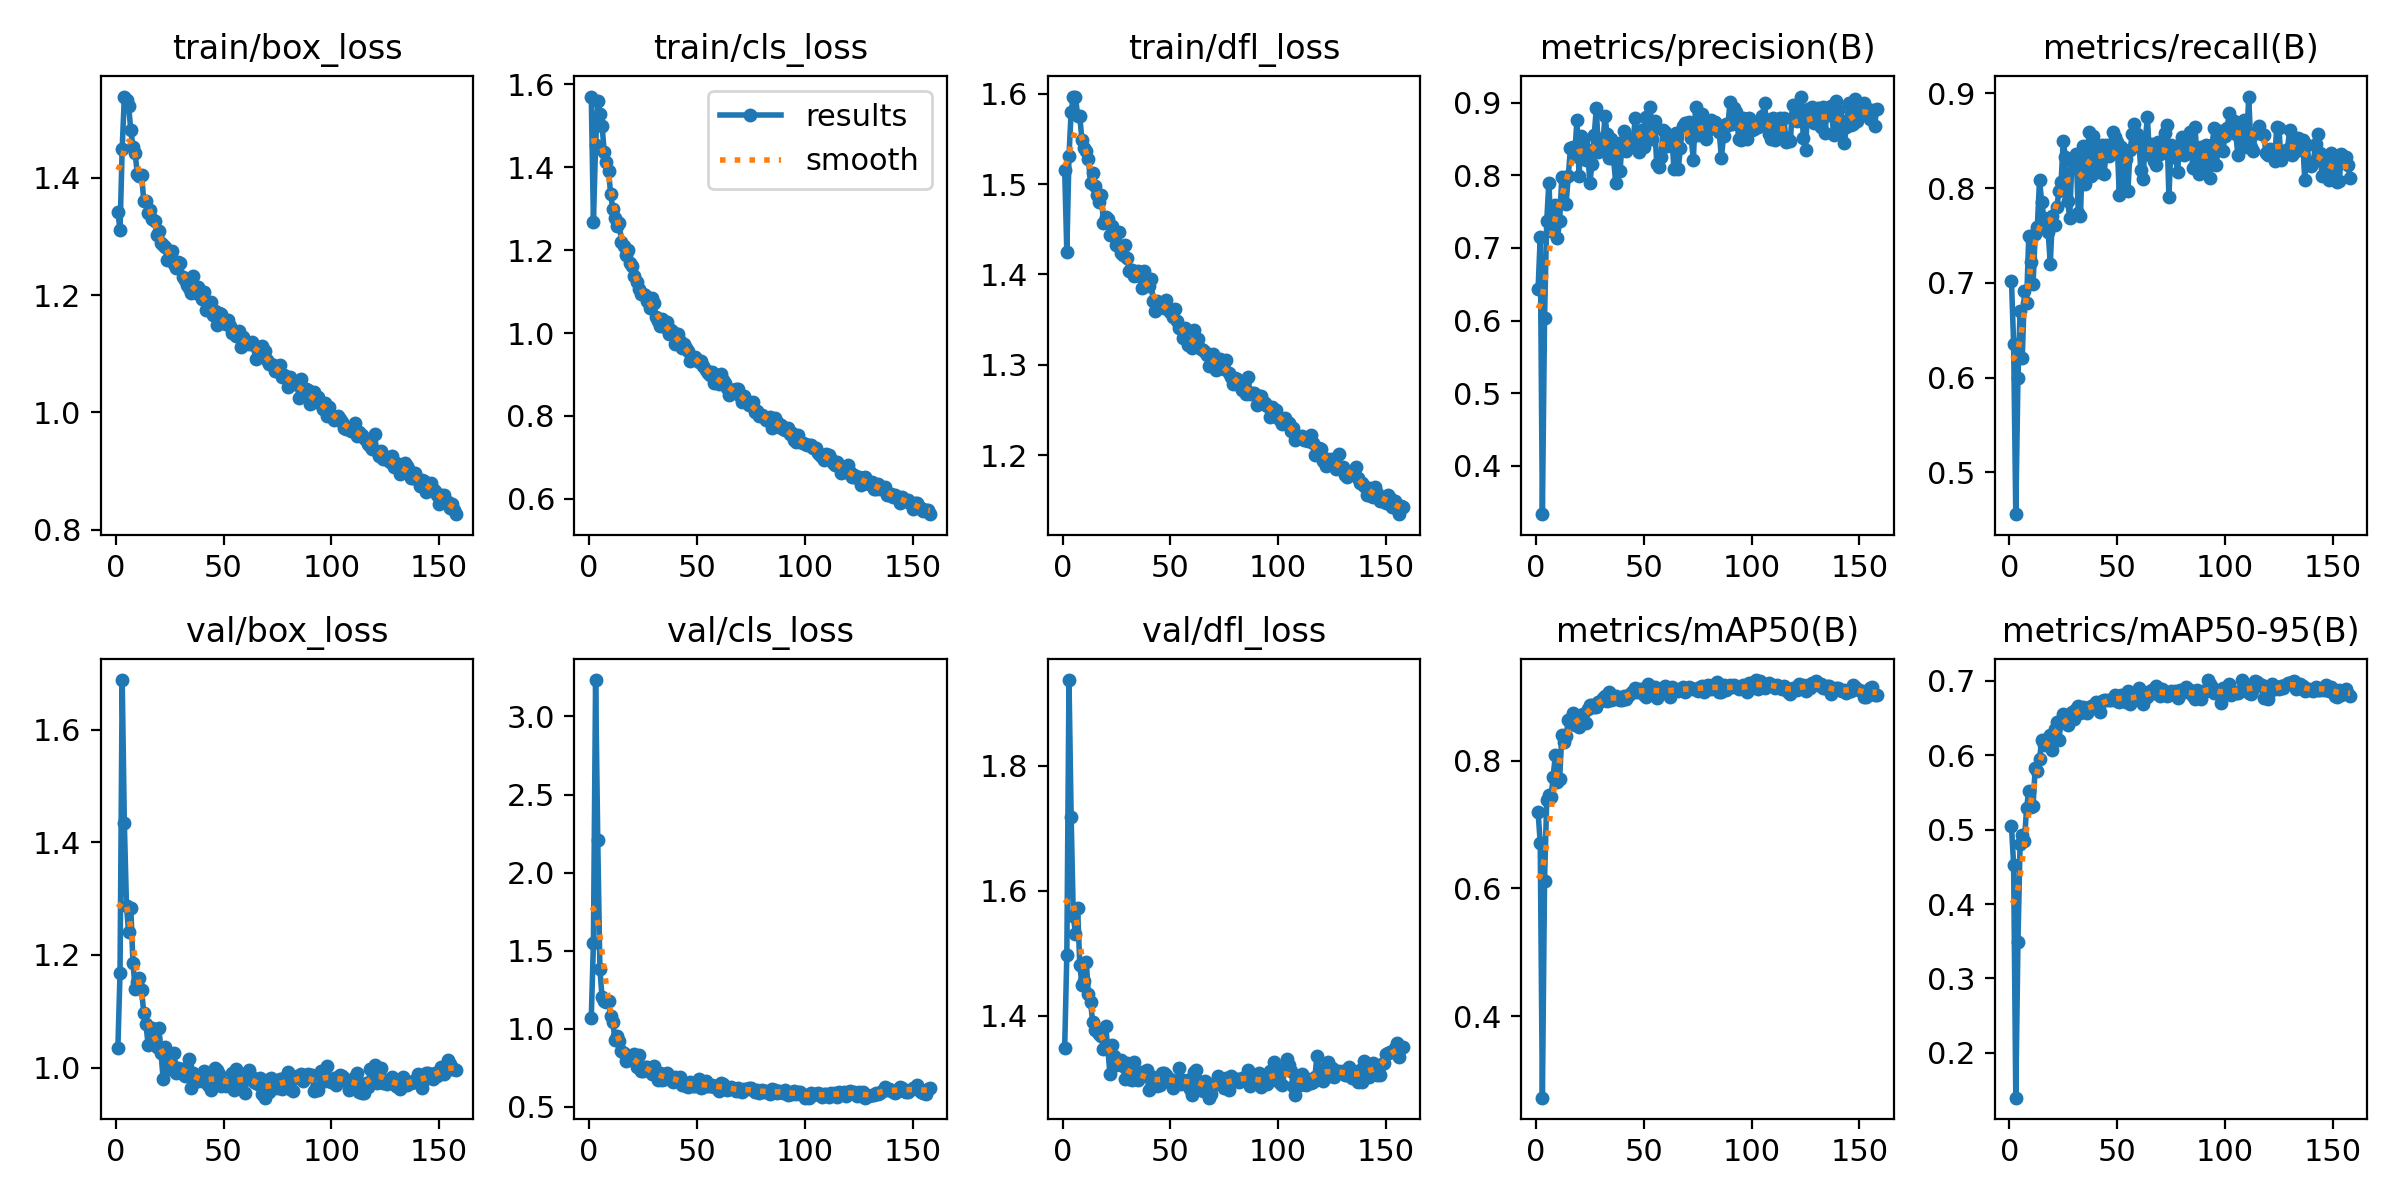

In [ ]:
metrics[0].show()